## Assignment 2

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong


**Question**

Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


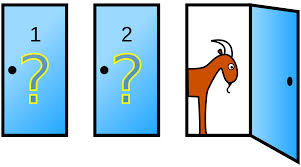

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#)

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


Text(0, 0.5, 'Average wins')

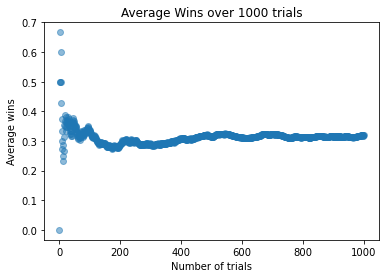

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

num_games = 1000
sample_size_array = np.arange(1,num_games+1)

# Strategy 1 - Choosing not to change your answer. Same as randomly choosing from 3 doors.

doors = np.arange(1,4)

# Setup what doors have a car

car = np.random.choice(doors,num_games,replace=True)

# Randomly choose a door

select = np.random.choice(doors,num_games,replace=True)

# See which doors were correctly chosen

wins = (car == select)
win_prob = wins.cumsum()/sample_size_array
plt.scatter(sample_size_array,win_prob,alpha=0.5)
plt.title('Average Wins over 1000 trials')
plt.xlabel('Number of trials')
plt.ylabel('Average wins')


Text(0, 0.5, 'Average wins')

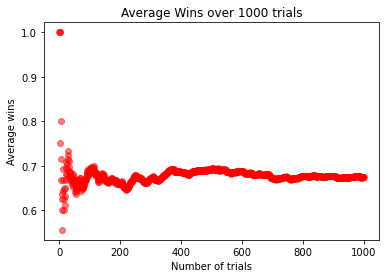

In [4]:
num_games = 1000
sample_size_array = np.arange(1,num_games+1)

# Strategy 2 - Choosing to change your answer    

doors = np.arange(1,4)

# Setup what doors have a car or goat

car = np.random.choice(doors,num_games,replace=True)
goat1 = car + 1
goat1[goat1 == 4] = 1
goat2 = car - 1
goat2[goat2 == 0] = 3
goats = np.vstack((goat1,goat2))

# Randomly choose a door

select = np.random.choice(doors,num_games,replace=True)

# A goat is revealed that is not the selected door

reveal = np.array([])
for i in np.arange(num_games):
    if select[i] == goat1[i]:
        reveal = np.append(reveal,goat2[i]) # Since the player has a goat chosen, select the other goat
    elif select[i] == goat2[i]:
        reveal = np.append(reveal,goat1[i]) # Since the player has a goat chosen, select the other goat
    else:
        rand_row = np.random.randint(2) # Randomly choose between goat1 or goat2
        reveal = np.append(reveal,goats[rand_row,i]) # Add the ith column from the random goat row to reveal

# Change the player choice to the next door

new_select = 6 - select - reveal

# See which doors were correctly chosen

wins = car == new_select
win_prob_switch = wins.cumsum()/sample_size_array
plt.scatter(sample_size_array,win_prob_switch,alpha=0.5,color='red')
plt.title('Average Wins over 1000 trials')
plt.xlabel('Number of trials')
plt.ylabel('Average wins')


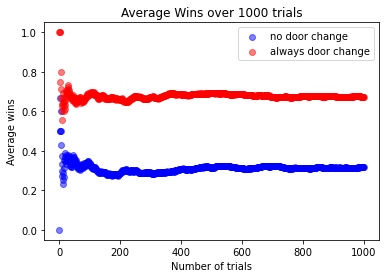

In [9]:
plt.scatter(sample_size_array,win_prob,alpha=0.5,color='blue',label='no door change')
plt.scatter(sample_size_array,win_prob_switch,alpha=0.5,color='red',label='always door change')
plt.title('Average Wins over 1000 trials')
plt.xlabel('Number of trials')
plt.ylabel('Average wins')
plt.legend(loc="upper right")